In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy import stats



In [4]:
db = pd.read_csv('data/temperature.csv')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         192 non-null    object 
 1   Ha Noi       192 non-null    float64
 2   Vinh         192 non-null    float64
 3   Da Nang      192 non-null    float64
 4   Nha Trang    192 non-null    float64
 5   Ho Chi Minh  192 non-null    float64
 6   Ca Mau       192 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.6+ KB


In [52]:
db.describe()

,Ha Noi,Vinh,Da Nang,Nha Trang,Ho Chi Minh,Ca Mau
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,27.719271,26.719896,25.522500,26.166875,26.159219,26.643750
std,3.075625,2.314602,1.932761,0.923510,1.719259,2.144252
min,14.000000,22.600000,20.930000,24.500000,23.220000,11.000000
25%,25.645000,24.875000,24.010000,25.485000,24.797500,25.297500
50%,27.685000,26.360000,25.310000,26.085000,25.930000,26.230000
75%,29.947500,28.022500,26.932500,26.795000,27.485000,27.975000
max,42.000000,32.570000,29.880000,28.680000,31.060000,31.370000


<Axes: >

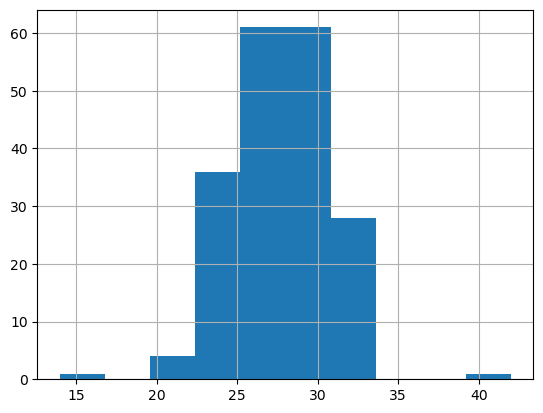

In [54]:


db['Ha Noi'].hist()



In [56]:
mean_db = db['Ha Noi'].mean()
print(mean_db)

27.719270833333336


In [58]:
std_db = db['Ha Noi'].std()
print(std_db)

3.0756254188117875


In [60]:
lower_limit = mean_db - 1 * std_db
print(lower_limit)

24.64364541452155


In [62]:
uper_limit = mean_db + 1 * std_db
print(uper_limit)

30.794896252145122


In [64]:
((db['Ha Noi'] >= lower_limit) & (db['Ha Noi'] <= uper_limit)).mean() * 100

70.83333333333334

In [68]:
db['z_score'] = stats.zscore(db['Ha Noi'], ddof=1)
db

,time,Ha Noi,Vinh,Da Nang,Nha Trang,Ho Chi Minh,Ca Mau,z_score
0,00 15-9-2019,25.65,24.79,24.01,25.06,25.48,24.97,-0.672797
1,01 15-9-2019,25.31,24.21,24.02,24.93,25.16,24.83,-0.783343
2,02 15-9-2019,25.05,23.73,23.89,24.79,24.80,24.55,-0.867879
3,03 15-9-2019,24.79,23.36,23.83,24.84,24.74,24.48,-0.952415
4,04 15-9-2019,24.59,23.05,23.69,24.82,24.80,24.38,-1.017442
...,...,...,...,...,...,...,...,...
187,19 22-9-2019,26.56,24.92,24.10,26.11,25.56,26.43,-0.376922
188,20 22-9-2019,25.69,24.77,23.76,25.97,25.23,25.88,-0.659791
189,21 22-9-2019,24.81,24.47,23.40,25.86,25.05,25.29,-0.945912
190,22 22-9-2019,23.97,24.22,22.95,25.74,24.92,24.87,-1.219027


In [74]:
db[(db['z_score']>3) | (db['z_score']<-3)]

,time,Ha Noi,Vinh,Da Nang,Nha Trang,Ho Chi Minh,Ca Mau,z_score
15,15 15-9-2019,42.0,30.58,26.29,26.68,27.29,30.59,4.643195
125,05 20-9-2019,14.0,22.60,23.98,25.21,23.25,24.07,-4.460644


In [78]:
print('dữ liệu trước khi lọc: ',db.shape)
db_fillrered = db[db['z_score']<3]
print('dữ liệu sau khi lọc: ',db_fillrered.shape)

dữ liệu trước khi lọc:  (192, 8)
dữ liệu sau khi lọc:  (191, 8)
